# Mini Project 1: COMP 551 project - Red Wine Dataset

### by GROUP 97 (Nikhil Podila, Shantanil Bagchi and Surya Penmesta)

Dataset 1 (Wine Quality):

Link:https://archive.ics.uci.edu/ml/datasets/Wine+Quality

This is a dataset where the goal is to predict the quality of wine based on its chemical properties.

Note: We will only be using the red wine subset of the data.This data contains quality ratings from 0-10. We will convert this task to a binary classification by defining the ratings of 6,7,8,9,10 as positive (i.e., 1) and all other ratings as negative (i.e., 0).

## Importing necessary libraries

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

## Task 1: Acquire, preprocess, and analyze the data

The essential subtasks for this part of the project are:
1. Download the datasets (noting the correct subsets to use, as discussed above).
2. Load the datasets into numpy objects (i.e., arrays or matrices) in Python. Remember to convert the wine dataset
to a binary task, as discussed above.
3. Clean the data. Are there any missing or malformed features? Are there are other data oddities that need to be
dealt with? You should remove any examples with missing or malformed features and note this in your
report.
4. Compute some statistics on the data. E.g., what are the distributions of the positive vs. negative classes, what
are the distributions of some of the numerical features?

### Dataset 1 (Red Wine Quality)

In [44]:
# Load the Red Wines dataset
data1 = pd.read_csv("winequality-red.csv", sep=';')

# Display the first few records
data1.shape
data=data1

In [45]:
# For each feature find the data points with extreme high or low values
#for feature in data1.keys():
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
 #   Q1 = np.percentile(data1[feature], q=25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
  #  Q3 = np.percentile(data1[feature], q=75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    #interquartile_range = Q3 - Q1
   # step = 1.5 * interquartile_range
    
    # Display the outliers
    #print("Data points considered outliers for the feature '{}':".format(feature))
    #display(data[~((data[feature] >= Q1 - step) & (data[feature] <= Q3 + step))])
    
    #data[~((data['quality'] >= Q1 - step) & (data['quality'] <= Q3 + step))].head()
    # OPTIONAL: Select the indices for data points you wish to remove
    #outliers = [267,278,390,440,455,459,481,495,498,517,588,690,828,832,899,1061,1090,1120,1202,1269,1299,1374,1403,1449,1469,1478,1505,1549]
    # Remove the outliers, if any were specified
   # data = data1.drop(data1.index[outliers]).reset_index(drop = True)
    
    #data_out = data[~((data < (Q1 - step)) |(data > (Q3 + step))).any(axis=1)]
    #data=good_data

In [46]:
# Using lambda function to change values in the Quality column as per requirement
data["quality"] = data["quality"].apply(lambda x: 1 if x>5 else 0)

#Diaplay the changed records
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


## Checking number of total wine data and percentage of good wine 

In [47]:
#Check number of entries in a cloumn
number_of_wines = data.shape[0]

# Number of wines with quality {6,7,8,9,10}
wine_quality_good = data.loc[(data['quality'] == 1)] #Accessing Column using label
number_of_good_wine = wine_quality_good.shape[0] #Returns Dimensionality of DataFrame in tuple format

# Number of wines with quality below 5
wine_quality_notgood = data.loc[(data['quality'] == 0)]
number_of_notgood_wine = wine_quality_notgood.shape[0]

# Percentage of wines with good quality
good_wine_percentage = number_of_good_wine*100/number_of_wines

# Print the results
print("Total number of wine: {}".format(number_of_wines))
print("Wines with rating 6 and above: {}".format(number_of_good_wine))
print("Wines with rating less than 5: {}".format(number_of_notgood_wine))
print("Percentage of wines with quality 6 and above: {:.2f}%".format(good_wine_percentage))

Total number of wine: 1599
Wines with rating 6 and above: 855
Wines with rating less than 5: 744
Percentage of wines with quality 6 and above: 53.47%


## Plotting Pie Chart to show distribution of positive and negative classes

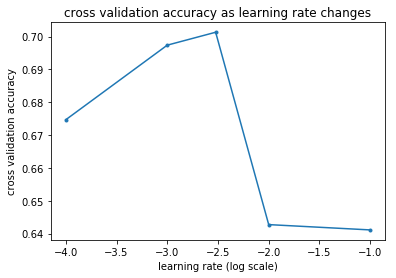

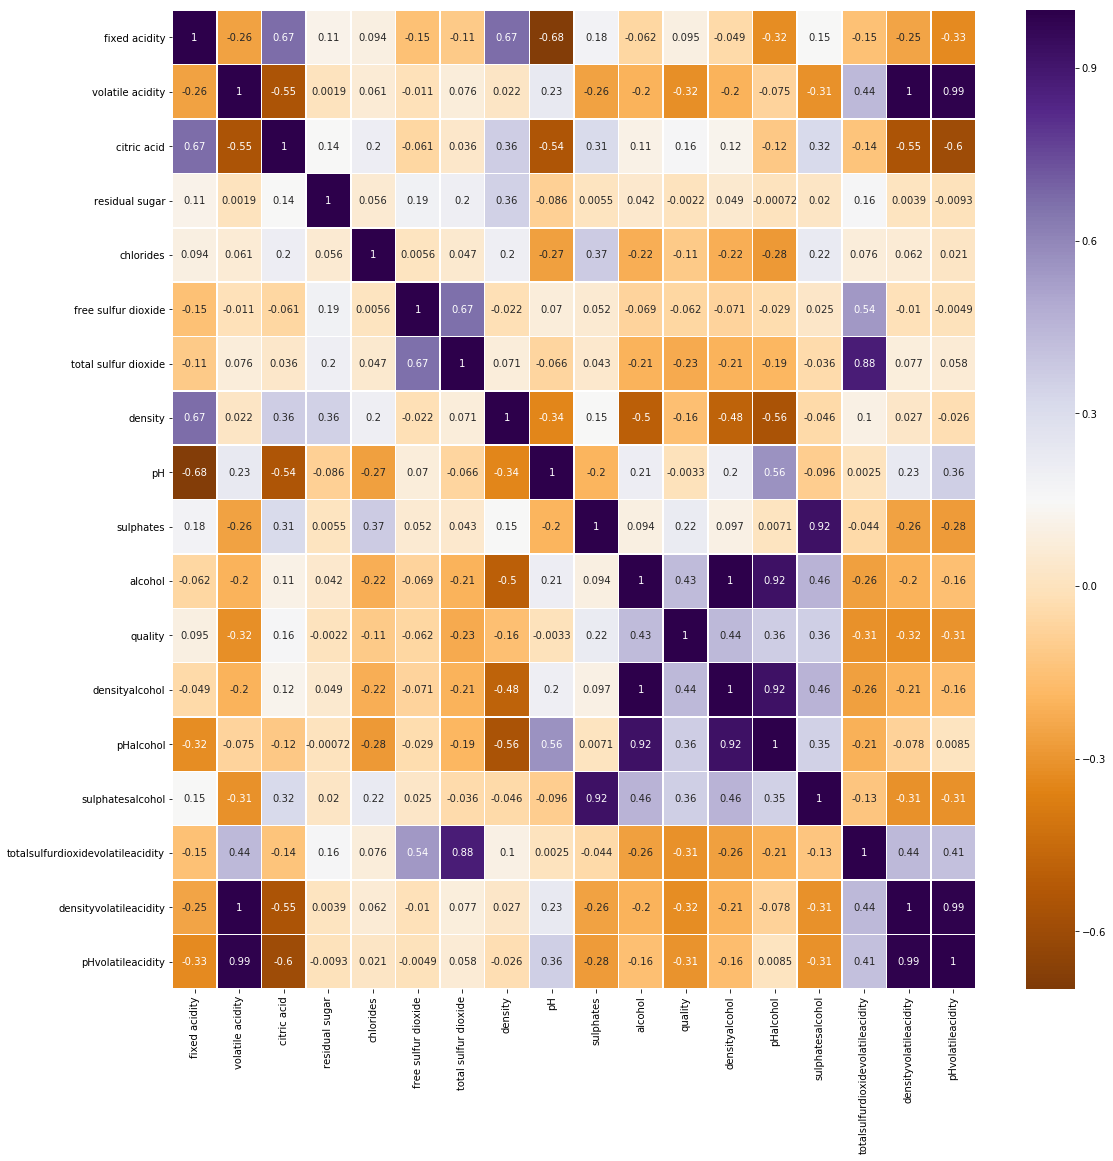

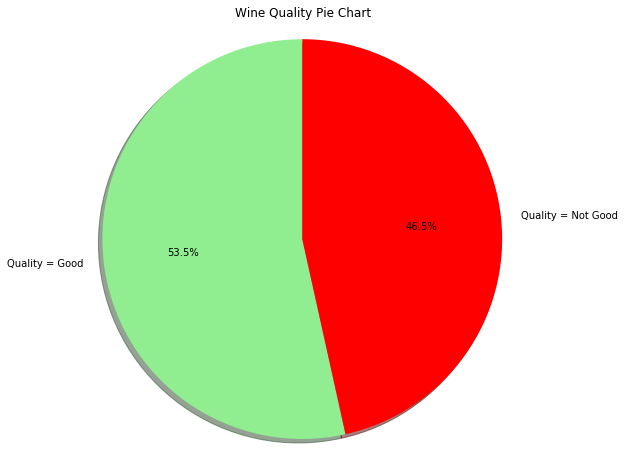

In [48]:
# Data to plot
plt.figure(figsize = (8,8))
labels = 'Quality = Good', 'Quality = Not Good'
plt.title('Wine Quality Pie Chart')
sizes = [number_of_good_wine, number_of_notgood_wine]
colors = ['lightgreen', 'red']

# Plot
plt.pie(sizes,  labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()

## Understanding Individual Distributions

In [49]:
sns.distplot(data['fixed acidity'])

### The Fixed acidity value seems to display a normal distribution with major samples exhibiting values between 6.5 g/dm3 to 9.2 g/dm3

In [50]:
sns.distplot(data['volatile acidity'])

In [51]:
sns.distplot(np.log(data['volatile acidity']))

### The Volatile acidity value seems to display a bimodal normal distribution with major samples exhibiting values between 0.25g/dm3 to 0.79g/dm3 but on taking the log distribution the plot becomes normal distributed.

In [52]:
sns.distplot(data['citric acid'])

In [53]:
sns.distplot(data['residual sugar'])

### The histogram is highly left skewed. There are very less wine samples with residual sugar more than 8.

In [54]:
sns.distplot(data['chlorides'])

In [55]:
sns.distplot(data['chlorides'])

In [56]:
sns.distplot(data['free sulfur dioxide'])
#Most of the free sulfur dioxide seems to be between the 1-40.

In [57]:
sns.distplot(data['total sulfur dioxide'])
#Most of the total sulfur dioxide seems to a have a spread between 0 and 150

In [58]:
sns.distplot(np.log(data['total sulfur dioxide']))

In [59]:
sns.distplot(data['density'])

In [60]:
sns.distplot(data['pH'])
#pH distrbution seems to be normally distributed with major samples exhibiting values between 3.0 and 3.5.

In [61]:
sns.distplot(data['alcohol'])
#The alcohol content seems to vary from 8 to 14 with most of data around 9-10

In [62]:
sns.distplot(data['sulphates'])

In [63]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.534709
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.498950
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


In [64]:
correlation = data.corr()
plt.figure(figsize=(12, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0.5, linecolor="white",vmin=-0.7, cmap="PuOr")

## Correlation matrix output shows following behaviour:

### Fixed Acidity
It shows positive correlation with citric acid which is true since citric acid is one of the fixed acid. It also shows positive correlation with density.
It also shows significant negative correlation with pH and volatile acidity.
### Volatile Acidity
It is highly negatively correlated with citric acid and quality.
### Free SO2
It shows significant positive correlation with total SO2, and very less correlation with sulphates.
### Density
Significant negative correlation is observed with alcohol, acidity (fixed and citric acid) and pH.
### Quality
Quality and alcohol is positively correlated along with negative correlation with volatile acidity.

Also from above scatterplot matrix, chlorides and sulphates doesn’t seem to have any kind of effect to quality

In [65]:
#Visualize the co-relation between alcohol and quality

#Create a new dataframe containing only pH and fixed acidity columns to visualize their co-relations
fixedAcidity_pH = data[['alcohol', 'quality']]

#Initialize a joint-grid with the dataframe, using seaborn library
gridA = sns.JointGrid(x="quality", y="alcohol", data=fixedAcidity_pH, size=6)

#Draws a regression plot in the grid 
#gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})
gridA=gridA.plot(sns.regplot, sns.distplot)

#Draws a distribution plot in the same grid
#gridA = gridA.plot_marginals(sns.distplot)

In [66]:
#Visualize the co-relation between pH and fixed Acidity

#Create a new dataframe containing only pH and fixed acidity columns to visualize their co-relations
fixedAcidity_pH = data[['pH', 'fixed acidity']]

#Initialize a joint-grid with the dataframe, using seaborn library
gridA = sns.JointGrid(x="fixed acidity", y="pH", data=fixedAcidity_pH, size=6)

#Draws a regression plot in the grid 
#gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})
gridA=gridA.plot(sns.regplot, sns.distplot)

#Draws a distribution plot in the same grid
#gridA = gridA.plot_marginals(sns.distplot)

In [67]:
# Separating Feature Variables from target Variables
x = data.iloc[:,:-1]
y = data['quality']

In [68]:
# Train Test split
data_train = data.sample(frac = 0.8)
#msk = np.random.rand(len(data)) < 0.8
x_train = np.array(data_train.iloc[:, :-1])
y_train = np.array(data_train["quality"])

data_test = data.drop(data_train.index)
x_test = np.array(data_test.iloc[:, :-1])
y_test = np.array(data_test["quality"])

print(len(y_test), len(y_train))
print(len(x_test), len(x_train))

320 1279
320 1279


## Task 2:  Implementing the models

### Logistic regression using gradient descent

In [69]:
# Implementation of logistic regression in a class
# Compute sigmoid over a matrix of values (element wise)
sigma = lambda y: np.array(list(map(lambda x: 1/(1+np.exp(-x)), y)))
    
# Logistric Regression description:
# fit function performs training
# predict function performs testing
class LogisticRegression:
    
    # Constructor to initialize weights,
    # and assign undefined value to Training mean and Standard Devi
    def __init__(self, initial_weights):
        self.w = initial_weights
        self.x_train_mean = np.nan
        self.x_train_std = np.nan
        
    # Check if this is required?
    def get_training_data_statistics(self):
        try:
            assert self.x_train_mean != np.nan
            assert self.x_train_var != np.nan
            return [self.x_train_mean, self.x_train_var]
        except AssertionError as e:
            print("No model has been trained yet")
    
    # Normalize data for running Regression
    # from_train argument: If called from training code, 
    # the mean and Standard Deviation are noted for future use.
    def normalize_data(self, x, from_train = False):
        
        # Save Training mean and SD.
        # Test data must be normalized using Training Mean and Training SD,
        # because of the i.i.d assumption
        if from_train:
            self.x_train_mean = np.mean(x, axis = 0)
            self.x_train_std = np.std(x,axis = 0)
        
        # Return normalized values
        return (x - self.x_train_mean)/self.x_train_std
        
    # Performs training
    # Inputs: Training data - input features and targets, Learning rate, 
    # number of Iterations, bool - should data be normalized?
    def fit(self, x_train, y_train, alpha, iters, normalize = True):
        
        # Normalize data if requested. Save the Training mean and SD
        if normalize:
            x_train = self.normalize_data(x_train, from_train = True)
        
        # Convert y_train to 2D matrix
        y_train = y_train[np.newaxis]
        
        # Maintain a list of cross entropy losses
        po = []
        
        # Small value to prevent Log(0) situation
        epsilon = 1e-8
        
        # Iterations of Weight updates
        for iterate in range(iters):
            
            # Cross Entropy calc
            ce = -1*(y_train.dot(np.log(sigma(self.w.T.dot(x_train.T)).T+epsilon)) + (1 - y_train).dot(np.log(1-sigma(self.w.T.dot(x_train.T)).T+epsilon)))
            
            # Gradient calc - Change in weights
            deltaW = x_train.T.dot((y_train - sigma(self.w.T.dot(x_train.T))).T)
            
            # Update list of losses
            po = po + ce.flatten().tolist()
            
            # Weight update equation
            self.w += alpha*deltaW
        return po

    def predict(self, x_test, normalize = True):
        # Predictions must be performed here
        # Convert probability to 0 or 1 value
        if normalize:
            x_test = self.normalize_data(x_test)
        y_pred = 1*(self.w.T.dot(x_test.T) > 0.5)
        return y_pred
    
# Function to evaluate accuracies
def evaluate_acc(y_test, y_pred):
    return np.mean(y_test == y_pred)

In [70]:
w = np.array(0.1*np.random.rand(x_train.shape[1]))[np.newaxis].T
reg = LogisticRegression(w)
f = reg.fit(x_train,y_train,0.001,200)
y_pred = reg.predict(x_test)
evaluate_acc(y_test, y_pred)

0.70937499999999998

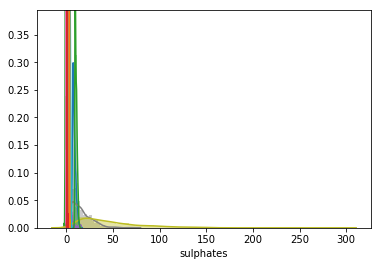

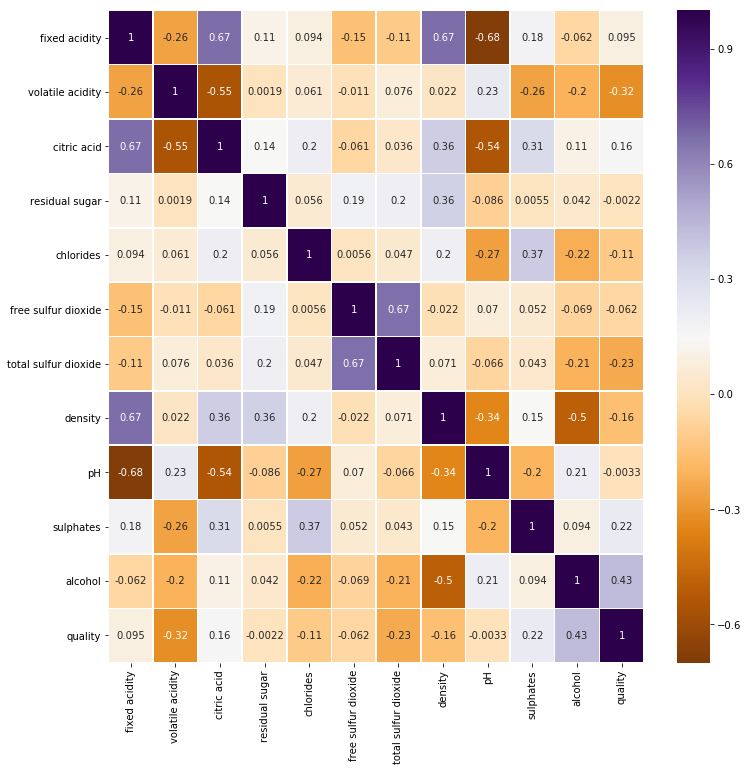

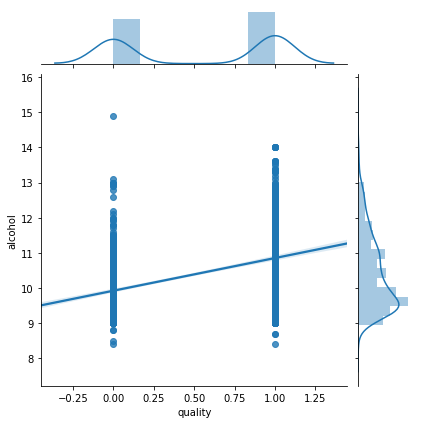

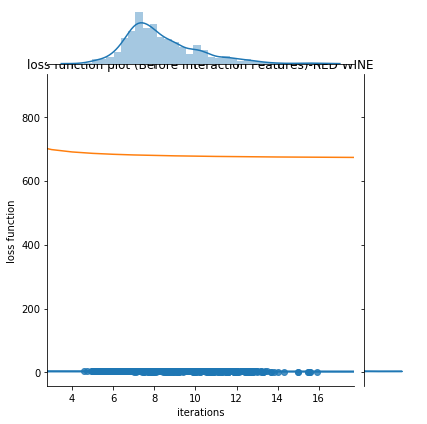

In [71]:
plt.title('loss function plot (Before Interaction Features)-RED WINE')
plt.xlabel('iterations'), plt.ylabel('loss function')
plt.plot(f)
plt.show()


###  Linear discriminant analysis

In [72]:
# Implementation of LDA in a class
class LDA():
    """
    Class to that implements LDA from scratch
    """
    
    def __init__(self):
        """
        Initializing the required libraries to null.
        """
        pass
    
    def fit(self, x_train, y_train, alpha=None, iters=None):
        """
        Function learns the parameters of the LDA model.
        Input features: x_train, input labels: y_train
        """
        self.Py0 = np.sum(y_train==0)/y_train.shape[0]
        self.Py1 = np.sum(y_train==1)/y_train.shape[0]
        self.mu0 = x_train.T @ (y_train==0) / np.sum(y_train==0)
        self.mu1 = x_train.T @ (y_train==1) / np.sum(y_train==1)
        self.sigma = np.zeros((x_train.shape[1], x_train.shape[1]))
        
        for i in range(x_train.shape[0]):
            self.sigma = self.sigma + (y_train[i]==0) * np.outer(x_train[i]-self.mu0,x_train[i]-self.mu0)
            self.sigma = self.sigma + (y_train[i]==1) * np.outer(x_train[i]-self.mu1,x_train[i]-self.mu1)
        self.sigma = self.sigma / (y_train.shape[0]-2)
        
        pass
    
    def predict(self, Xtest):
        """
        Function that takes training features as input
        """
        self.w0 = np.log(self.Py1) - np.log(self.Py0) \
             + 0.5 * (np.expand_dims(self.mu0, axis=1).T @ np.linalg.inv(self.sigma) @ np.expand_dims(self.mu0, axis=1)) \
             - 0.5 * (np.expand_dims(self.mu1, axis=1).T @ np.linalg.inv(self.sigma) @ np.expand_dims(self.mu1, axis=1))
        self.w1 = np.linalg.inv(self.sigma) @ (self.mu1-self.mu0)
        y = self.w0 + Xtest @ self.w1
        y = y>0
        return y[0]

In [73]:
w = np.array(0.1*np.random.rand(x_train.shape[1]))[np.newaxis].T
lda = LDA()
f = lda.fit(x_train,y_train)
y_pred = lda.predict(x_test)
evaluate_acc(y_test, y_pred)

0.74062499999999998

## Task 3: Running the experiments

### Implementing k-fold cross validation

In [74]:


# Example usage of cross_validation:
#   cross_validation(Reg, 4, x_train, y_train, 0.003, 200)


# To perform cross validation
# Reg : Regressor term
# k : Number of folds
# x_train : Training input data
# y_train : Training target data
# alpha : For Logistic Regression, Learning rate. Otherwise None.
# iters: For Logistic Regression, Number of iterations. Otherwise None.
def cross_validation(Reg, k, x_train, y_train, alpha=None, iters=None):
    # Number of samples (approx) in each fold
    fold_size = int(len(x_train)/k)
    
    # accuracies from different folds
    cross_validation_accuracies = 0
    
    # Evaluate for each fold
    for fold_number in range(k):
        
        # Index of start of fold
        val_start = fold_number*fold_size
        
        # Index of end of fold
        val_end = (fold_number+1) * fold_size
        
        # For last fold, consider validation data from start of last fold till end of data (may include more than approx fold size)
        # For other folds, evaluate from start of the fold
        if fold_number == (k-1):
            # Validation data for last fold
            x_val_fold = x_train[val_start:,:]
            y_val_fold = y_train[val_start:]
            
            # Training data for other folds
            x_train_fold = x_train[:val_start,:]
            y_train_fold = y_train[:val_start]
        else:
            # Validation data for Nth fold
            x_val_fold = x_train[val_start:val_end,:]
            y_val_fold = y_train[val_start:val_end]
            
            # Training data for other folds
            x_train_fold = np.concatenate((x_train[:val_start,:],x_train[val_end:,:]),axis = 0)
            y_train_fold = np.concatenate((y_train[:val_start],y_train[val_end:]))
        
        # Training on other folds
        f = Reg.fit(x_train_fold, y_train_fold, alpha, iters)
        
        # Predictions on Validation fold
        y_pred_fold = Reg.predict(x_val_fold)
        
        # Evaluate accuracy for each fold
        cross_validation_accuracies += evaluate_acc(y_val_fold, y_pred_fold)
        
    # Take mean of Validation accuracies in all folds
    cross_validation_accuracies /= k
    
    return cross_validation_accuracies

### Experiment 1: Test different learning rates for logistic regression

In [75]:
cv_acc = []
lr_vec = [.0001, .001, 0.003, 0.01, 0.1]
for lr in lr_vec:
    w = np.array(0.1*np.random.rand(x_train.shape[1]))[np.newaxis].T
    reg = LogisticRegression(w)
    cv_acc.append(cross_validation(reg, 5, x_train, y_train, lr, 20))
    
plt.plot(np.log10(lr_vec), cv_acc, '.-')
plt.title('cross validation accuracy as learning rate changes')
plt.xlabel('learning rate (log scale)')
plt.ylabel('cross validation accuracy')

###  Experiment 2: Compare the runtime and accuracy of LDA and logistic regression

In [76]:
import time
start_time = time.time()

for i in range(5):
    w = np.array(0.1*np.random.rand(x_train.shape[1]))[np.newaxis].T
    reg = LogisticRegression(w)
    Acc=cross_validation(reg, 5, x_train, y_train, lr, 20)

print('Time to run logistic regression 5 times: {} seconds'.format(time.time()-start_time))
print('The average accuracy after k-fold cross validation is {}'.format(Acc))

start_time = time.time()
for i in range(5):
    reg = LDA()
    ACC=cross_validation(reg, 5, x_train, y_train, lr, 20)

print('Time to run LDA 5 times: {} seconds'.format(time.time()-start_time))
print('The average accuracy after k-fold cross validation is {}'.format(ACC))

Time to run logistic regression 5 times: 0.22000622749328613 seconds
The average accuracy after k-fold cross validation is 0.6404027556968733
Time to run LDA 5 times: 1.864044427871704 seconds
The average accuracy after k-fold cross validation is 0.7465727912786736


In [77]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
actual = y_test 
predicted = y_pred 
results = confusion_matrix(actual, predicted) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(actual, predicted) )
print('Report : ')
print(classification_report(actual, predicted))

ModuleNotFoundError: No module named 'sklearn'

### Experiment 3:  For the wine dataset, find a new subset of features and/or additional features that improve the accuracy

In [78]:
data['densityalcohol'] = data['density']*data['alcohol']
data['pHalcohol'] = data['pH']*data['alcohol']
data['sulphatesalcohol'] = data['sulphates']*data['alcohol']
data['totalsulfurdioxidevolatileacidity'] = data['total sulfur dioxide']*data['volatile acidity']
data['densityvolatileacidity'] = data['density']*data['volatile acidity']
data['pHvolatileacidity'] = data['pH']*data['volatile acidity']
#data['log_volatileacidity'] = np.log(data['volatile acidity'])
#data['log_chlorides'] = np.log(data['chlorides'])
#data['log_alcohol'] = np.log(data['alcohol'])
#del data['alcohol']
#del data['volatile acidity']
#del data['chlorides']

In [79]:
correlation = data.corr() 
#display(correlation) 
plt.figure(figsize=(18, 18)) 
print(data.corr()['quality'].drop('quality')) 
heatmap = sns.heatmap(correlation, annot=True, linewidths=0.5, linecolor="white",vmin=-0.7, cmap="PuOr")

fixed acidity                        0.095093
volatile acidity                    -0.321441
citric acid                          0.159129
residual sugar                      -0.002160
chlorides                           -0.109494
free sulfur dioxide                 -0.061757
total sulfur dioxide                -0.231963
density                             -0.159110
pH                                  -0.003264
sulphates                            0.218072
alcohol                              0.434751
densityalcohol                       0.435769
pHalcohol                            0.363226
sulphatesalcohol                     0.359625
totalsulfurdioxidevolatileacidity   -0.310855
densityvolatileacidity              -0.322266
pHvolatileacidity                   -0.305449
Name: quality, dtype: float64


In [80]:
correlations = data.corr()['quality'].drop('quality')
def get_features(correlation_threshold):
    abs_corrs = correlations.abs()
    high_correlations = abs_corrs[abs_corrs > correlation_threshold].index.values.tolist()
    return high_correlations
# taking features with correlation more than 0.05 as input x and quality as target variable y
features = get_features(0.05)
print(features)

# Data with new and selected features
data_new_features = data[features + ['quality']]


['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol', 'densityalcohol', 'pHalcohol', 'sulphatesalcohol', 'totalsulfurdioxidevolatileacidity', 'densityvolatileacidity', 'pHvolatileacidity']


In [81]:
# Train Test split
#msk = np.random.rand(len(data)) < 0.8
#x_train = np.array(data[msk][features])

#y_train = np.array(data[msk]["quality"])

#x_test = np.array(data[~msk][features])

#y_test = np.array(data[~msk]["quality"])

#print(len(y_test), len(y_train))
#print(len(x_test), len(x_train))

In [82]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'densityalcohol', 'pHalcohol',
       'sulphatesalcohol', 'totalsulfurdioxidevolatileacidity',
       'densityvolatileacidity', 'pHvolatileacidity'],
      dtype='object')

In [90]:
# Train Test split
data_train = data_new_features.sample(frac = 0.8)
#msk = np.random.rand(len(data)) < 0.8
x_train = np.array(data_train.iloc[:, :-1])
y_train = np.array(data_train["quality"])

data_test = data_new_features.drop(data_train.index)
x_test = np.array(data_test.iloc[:, :-1])
y_test = np.array(data_test["quality"])

print(len(y_test), len(y_train))
print(len(x_test), len(x_train))

320 1279
320 1279


In [91]:
import time
start_time = time.time()

for i in range(5):
    w = np.array(0.1*np.random.rand(x_train.shape[1]))[np.newaxis].T
    reg = LogisticRegression(w)
    Acc=cross_validation(reg, 5, x_train, y_train, 0.001, 20)

print('Time to run logistic regression 5 times: {} seconds'.format(time.time()-start_time))
print('The average accuracy after k-fold cross validation is {}'.format(Acc))

start_time = time.time()
for i in range(5):
    reg = LDA()
    ACC=cross_validation(reg, 5, x_train, y_train, 0.003, 20)

print('Time to run LDA 5 times: {} seconds'.format(time.time()-start_time))
print('The average accuracy after k-fold cross validation is {}'.format(ACC))

Time to run logistic regression 5 times: 0.23615527153015137 seconds
The average accuracy after k-fold cross validation is 0.7051737451737451
Time to run LDA 5 times: 1.908273458480835 seconds
The average accuracy after k-fold cross validation is 0.7389113483231131


In [92]:
w = np.array(0.1*np.random.rand(x_train.shape[1]))[np.newaxis].T
lda = LDA()
f = lda.fit(x_train,y_train)
y_pred = lda.predict(x_test)
evaluate_acc(y_test, y_pred)

0.75624999999999998

In [93]:
w = np.array(0.1*np.random.rand(x_train.shape[1]))[np.newaxis].T
reg = LogisticRegression(w)
f = reg.fit(x_train,y_train,0.001,200)
y_pred = reg.predict(x_test)
evaluate_acc(y_test, y_pred)

0.71875